In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

2022-04-08 19:26:56.974531: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-04-08 19:26:56.974548: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
!unzip /home/kemi/Documents/train.zip
!unzip /home/kemi/Documents/valid.zip
!unzip /home/kemi/Documents/test.zip

Archive:  /home/kemi/Documents/train.zip
  inflating: train/tightlyChained/tightlyChained_aug_8509.jpg  
  inflating: train/tightlyChained/tightlyChained_aug_8750.jpg  
  inflating: train/tightlyChained/tightlyChained_aug_8748.jpg  
  inflating: train/tightlyChained/tightlyChained_aug_8751.jpg  
  inflating: train/tightlyChained/tightlyChained_aug_8753.jpg  
  inflating: train/tightlyChained/tightlyChained_aug_8744.jpg  
  inflating: train/tightlyChained/tightlyChained_aug_8643.jpg  
  inflating: train/tightlyChained/tightlyChained_aug_8757.jpg  
  inflating: train/tightlyChained/tightlyChained_aug_8627.jpg  
  inflating: train/tightlyChained/tightlyChained_aug_8641.jpg  
  inflating: train/tightlyChained/tightlyChained_aug_8752.jpg  
  inflating: train/tightlyChained/tightlyChained_aug_8755.jpg  
  inflating: train/tightlyChained/tightlyChained_aug_8746.jpg  
  inflating: train/tightlyChained/tightlyChained_aug_8749.jpg  
  inflating: train/tightlyChained/tightlyChained_aug_8603.jpg  

  inflating: train/looselyChained/looselyChained_aug_1989.jpg  
  inflating: train/tightlyChained/tightlyChained_aug_8581.jpg  
  inflating: train/looselyChained/looselyChained_aug_1991.jpg  
  inflating: train/looselyChained/looselyChained_aug_1954.jpg  
  inflating: train/looselyChained/looselyChained_aug_1979.jpg  
  inflating: train/looselyChained/looselyChained_aug_1945.jpg  
  inflating: train/looselyChained/looselyChained_aug_1971.jpg  
  inflating: train/looselyChained/looselyChained_aug_1995.jpg  
  inflating: train/looselyChained/looselyChained_aug_1939.jpg  
  inflating: train/looselyChained/looselyChained_aug_1941.jpg  
  inflating: train/looselyChained/looselyChained_aug_1966.jpg  
  inflating: train/tightlyChained/tightlyChained_aug_8591.jpg  
  inflating: train/looselyChained/looselyChained_aug_1950.jpg  
  inflating: train/looselyChained/looselyChained_aug_1988.jpg  
  inflating: train/looselyChained/looselyChained_aug_1976.jpg  
  inflating: train/looselyChained/loosel

  inflating: train/looselyChained/looselyChained_aug_1849.jpg  
  inflating: train/looselyChained/looselyChained_aug_1881.jpg  
  inflating: train/looselyChained/looselyChained_aug_1858.jpg  
  inflating: train/looselyChained/looselyChained_aug_1860.jpg  
  inflating: train/unchained/unchained_aug_99.jpg  
  inflating: train/unchained/unchained_aug_615.jpg  
  inflating: train/unchained/unchained_aug_619.jpg  
  inflating: train/unchained/unchained_aug_622.jpg  
  inflating: train/looselyChained/looselyChained_aug_1843.jpg  
  inflating: train/looselyChained/looselyChained_aug_1863.jpg  
  inflating: train/unchained/unchained_aug_682.jpg  
  inflating: train/unchained/unchained_aug_616.jpg  
  inflating: train/looselyChained/looselyChained_aug_1882.jpg  
  inflating: train/looselyChained/looselyChained_aug_1880.jpg  
  inflating: train/unchained/unchained_aug_628.jpg  
  inflating: train/unchained/unchained_aug_626.jpg  
  inflating: train/unchained/unchained_aug_618.jpg  
  inflating:

  inflating: train/unchained/unchained_aug_483.jpg  
  inflating: train/unchained/unchained_aug_453.jpg  
  inflating: train/looselyChained/looselyChained_aug_1972.jpg  
  inflating: train/unchained/unchained_aug_454.jpg  
  inflating: train/unchained/unchained_aug_463.jpg  
  inflating: train/unchained/unchained_aug_529.jpg  
  inflating: train/unchained/unchained_aug_479.jpg  
  inflating: train/looselyChained/looselyChained_aug_1722.jpg  
  inflating: train/unchained/unchained_aug_543.jpg  
  inflating: train/unchained/unchained_aug_515.jpg  
  inflating: train/unchained/unchained_aug_530.jpg  
  inflating: train/looselyChained/looselyChained_aug_1763.jpg  
  inflating: train/unchained/unchained_aug_481.jpg  
  inflating: train/looselyChained/looselyChained_aug_1735.jpg  
  inflating: train/unchained/unchained_aug_475.jpg  
  inflating: train/unchained/unchained_aug_537.jpg  
  inflating: train/unchained/unchained_aug_469.jpg  
  inflating: train/unchained/unchained_aug_528.jpg  
  

  inflating: train/looselyChained/looselyChained_aug_1770.jpg  
  inflating: train/looselyChained/looselyChained_aug_1767.jpg  
  inflating: train/looselyChained/looselyChained_aug_1783.jpg  
  inflating: train/looselyChained/looselyChained_aug_1773.jpg  
  inflating: train/tightlyChained/tightlyChained_aug_8624.jpg  
  inflating: train/looselyChained/looselyChained_aug_1732.jpg  
  inflating: train/looselyChained/looselyChained_aug_1753.jpg  
  inflating: train/looselyChained/looselyChained_aug_1796.jpg  
  inflating: train/looselyChained/looselyChained_aug_1852.jpg  
  inflating: train/looselyChained/looselyChained_aug_1755.jpg  
  inflating: train/looselyChained/looselyChained_aug_1736.jpg  
  inflating: train/looselyChained/looselyChained_aug_1747.jpg  
  inflating: train/tightlyChained/tightlyChained_aug_8588.jpg  
  inflating: train/looselyChained/looselyChained_aug_1788.jpg  
  inflating: train/looselyChained/looselyChained_aug_1748.jpg  
  inflating: train/looselyChained/loosel

  inflating: train/tightlyChained/tightlyChained_aug_8308.jpg  
  inflating: train/looselyChained/looselyChained_aug_1643.jpg  
  inflating: train/looselyChained/looselyChained_aug_1630.jpg  
  inflating: train/tightlyChained/tightlyChained_aug_8339.jpg  
  inflating: train/looselyChained/looselyChained_aug_1510.jpg  
  inflating: train/tightlyChained/tightlyChained_aug_8327.jpg  
  inflating: train/looselyChained/looselyChained_aug_1535.jpg  
  inflating: train/tightlyChained/tightlyChained_aug_8301.jpg  
  inflating: train/tightlyChained/tightlyChained_aug_8325.jpg  
  inflating: train/tightlyChained/tightlyChained_aug_8304.jpg  
  inflating: train/looselyChained/looselyChained_aug_1612.jpg  
  inflating: train/looselyChained/looselyChained_aug_1532.jpg  
  inflating: train/looselyChained/looselyChained_aug_1582.jpg  
  inflating: train/looselyChained/looselyChained_aug_1518.jpg  
  inflating: train/looselyChained/looselyChained_aug_1578.jpg  
  inflating: train/looselyChained/loosel

  inflating: train/unchained/unchained_aug_425.jpg  
  inflating: train/unchained/unchained_aug_420.jpg  
  inflating: train/tightlyChained/tightlyChained_aug_8182.jpg  
  inflating: train/unchained/unchained_aug_422.jpg  
  inflating: train/tightlyChained/tightlyChained_aug_8185.jpg  
  inflating: train/tightlyChained/tightlyChained_aug_8248.jpg  
  inflating: train/unchained/unchained_aug_427.jpg  
  inflating: train/unchained/unchained_aug_421.jpg  
  inflating: train/tightlyChained/tightlyChained_aug_8263.jpg  
  inflating: train/tightlyChained/tightlyChained_aug_8184.jpg  
  inflating: train/unchained/unchained_aug_442.jpg  
  inflating: train/tightlyChained/tightlyChained_aug_8283.jpg  
  inflating: train/looselyChained/looselyChained_aug_1744.jpg  
  inflating: train/unchained/unchained_aug_429.jpg  
  inflating: train/tightlyChained/tightlyChained_aug_8236.jpg  
  inflating: train/unchained/unchained_aug_430.jpg  
  inflating: train/tightlyChained/tightlyChained_aug_8444.jpg  


  inflating: train/unchained/unchained_aug_352.jpg  
  inflating: train/looselyChained/looselyChained_aug_1462.jpg  
  inflating: train/looselyChained/looselyChained_aug_1439.jpg  
  inflating: train/unchained/unchained_aug_348.jpg  
  inflating: train/unchained/unchained_aug_359.jpg  
  inflating: train/tightlyChained/tightlyChained_aug_8136.jpg  
  inflating: train/tightlyChained/tightlyChained_aug_8151.jpg  
  inflating: train/looselyChained/looselyChained_aug_1471.jpg  
  inflating: train/looselyChained/looselyChained_aug_1489.jpg  
  inflating: train/tightlyChained/tightlyChained_aug_8107.jpg  
  inflating: train/tightlyChained/tightlyChained_aug_8160.jpg  
  inflating: train/looselyChained/looselyChained_aug_1453.jpg  
  inflating: train/tightlyChained/tightlyChained_aug_8143.jpg  
  inflating: train/tightlyChained/tightlyChained_aug_8132.jpg  
  inflating: train/looselyChained/looselyChained_aug_1477.jpg  
  inflating: train/looselyChained/looselyChained_aug_1494.jpg  
  inflati

  inflating: train/tightlyChained/tightlyChained_aug_7849.jpg  
  inflating: train/tightlyChained/tightlyChained_aug_7819.jpg  
  inflating: train/tightlyChained/tightlyChained_aug_7876.jpg  
  inflating: train/looselyChained/looselyChained_aug_1257.jpg  
  inflating: train/tightlyChained/tightlyChained_aug_7841.jpg  
  inflating: train/tightlyChained/tightlyChained_aug_7869.jpg  
  inflating: train/looselyChained/looselyChained_aug_1285.jpg  
  inflating: train/tightlyChained/tightlyChained_aug_7823.jpg  
  inflating: train/looselyChained/looselyChained_aug_1249.jpg  
  inflating: train/unchained/unchained_aug_424.jpg  
  inflating: train/looselyChained/looselyChained_aug_1246.jpg  
  inflating: train/looselyChained/looselyChained_aug_1220.jpg  
  inflating: train/looselyChained/looselyChained_aug_1212.jpg  
  inflating: train/tightlyChained/tightlyChained_aug_7865.jpg  
  inflating: train/looselyChained/looselyChained_aug_1241.jpg  
  inflating: train/tightlyChained/tightlyChained_au

  inflating: train/unchained/unchained_aug_135.jpg  
  inflating: train/unchained/unchained_aug_256.jpg  
  inflating: train/unchained/unchained_aug_198.jpg  
  inflating: train/unchained/unchained_aug_276.jpg  
  inflating: train/unchained/unchained_aug_176.jpg  
  inflating: train/tightlyChained/tightlyChained_aug_7778.jpg  
  inflating: train/tightlyChained/tightlyChained_aug_7799.jpg  
  inflating: train/unchained/unchained_aug_132.jpg  
  inflating: train/unchained/unchained_aug_169.jpg  
  inflating: train/unchained/unchained_aug_155.jpg  
  inflating: train/unchained/unchained_aug_131.jpg  
  inflating: train/tightlyChained/tightlyChained_aug_7786.jpg  
  inflating: train/tightlyChained/tightlyChained_aug_7735.jpg  
  inflating: train/tightlyChained/tightlyChained_aug_7749.jpg  
  inflating: train/tightlyChained/tightlyChained_aug_7814.jpg  
  inflating: train/tightlyChained/tightlyChained_aug_7720.jpg  
  inflating: train/tightlyChained/tightlyChained_aug_7696.jpg  
  inflating

  inflating: train/tightlyChained/tightlyChained_aug_434.jpg  
  inflating: train/unchained/unchained_aug_0583.jpg  
  inflating: train/tightlyChained/tightlyChained_aug_423.jpg  
  inflating: train/tightlyChained/tightlyChained_aug_466.jpg  
  inflating: train/tightlyChained/tightlyChained_aug_7586.jpg  
  inflating: train/tightlyChained/tightlyChained_aug_482.jpg  
  inflating: train/unchained/unchained_aug_0512.jpg  
  inflating: train/tightlyChained/tightlyChained_aug_460.jpg  
  inflating: train/tightlyChained/tightlyChained_aug_439.jpg  
  inflating: train/tightlyChained/tightlyChained_aug_437.jpg  
  inflating: train/tightlyChained/tightlyChained_aug_7712.jpg  
  inflating: train/tightlyChained/tightlyChained_aug_433.jpg  
  inflating: train/unchained/unchained_aug_0549.jpg  
  inflating: train/tightlyChained/tightlyChained_aug_7583.jpg  
  inflating: train/tightlyChained/tightlyChained_aug_484.jpg  
  inflating: train/tightlyChained/tightlyChained_aug_449.jpg  
  inflating: tra

  inflating: train/unchained/unchained_aug_0227.jpg  
  inflating: train/unchained/unchained_aug_0290.jpg  
  inflating: train/unchained/unchained_aug_0284.jpg  
  inflating: train/unchained/unchained_aug_0285.jpg  
  inflating: train/unchained/unchained_aug_0353.jpg  
  inflating: train/unchained/unchained_aug_0288.jpg  
  inflating: train/unchained/unchained_aug_0241.jpg  
  inflating: train/unchained/unchained_aug_0258.jpg  
  inflating: train/unchained/unchained_aug_0317.jpg  
  inflating: train/tightlyChained/tightlyChained_aug_0420.jpg  
  inflating: train/unchained/unchained_aug_0328.jpg  
  inflating: train/unchained/unchained_aug_0239.jpg  
  inflating: train/unchained/unchained_aug_0245.jpg  
  inflating: train/unchained/unchained_aug_0242.jpg  
  inflating: train/unchained/unchained_aug_0289.jpg  
  inflating: train/unchained/unchained_aug_0274.jpg  
  inflating: train/unchained/unchained_aug_0267.jpg  
  inflating: train/unchained/unchained_aug_0303.jpg  
  inflating: train

  inflating: train/unchained/unchained_aug_0582.jpg  
  inflating: train/unchained/unchained_aug_0630.jpg  
  inflating: train/unchained/unchained_aug_0629.jpg  
  inflating: train/unchained/unchained_aug_0452.jpg  
  inflating: train/unchained/unchained_aug_0622.jpg  
  inflating: train/unchained/unchained_aug_0580.jpg  
  inflating: train/unchained/unchained_aug_0440.jpg  
  inflating: train/unchained/unchained_aug_0617.jpg  
  inflating: train/unchained/unchained_aug_0621.jpg  
  inflating: train/unchained/unchained_aug_0579.jpg  
  inflating: train/unchained/unchained_aug_0626.jpg  
  inflating: train/unchained/unchained_aug_0616.jpg  
  inflating: train/tightlyChained/tightlyChained_aug_0443.jpg  
  inflating: train/unchained/unchained_aug_0505.jpg  
  inflating: train/unchained/unchained_aug_0604.jpg  
  inflating: train/unchained/unchained_aug_0623.jpg  
  inflating: train/unchained/unchained_aug_0461.jpg  
  inflating: train/unchained/unchained_aug_0490.jpg  
  inflating: train

  inflating: train/unchained/unchained_aug_0484.jpg  
  inflating: train/looselyChained/looselyChained_aug_1038.jpg  
  inflating: train/looselyChained/looselyChained_aug_1071.jpg  
  inflating: train/looselyChained/looselyChained_aug_1032.jpg  
  inflating: train/looselyChained/looselyChained_aug_1026.jpg  
  inflating: train/looselyChained/looselyChained_aug_1014.jpg  
  inflating: train/looselyChained/looselyChained_aug_1023.jpg  
  inflating: train/unchained/unchained_aug_0510.jpg  
  inflating: train/looselyChained/looselyChained_aug_1030.jpg  
  inflating: train/looselyChained/looselyChained_aug_973.jpg  
  inflating: train/looselyChained/looselyChained_aug_1046.jpg  
  inflating: train/unchained/unchained_aug_0459.jpg  
  inflating: train/unchained/unchained_aug_0535.jpg  
  inflating: train/looselyChained/looselyChained_aug_1013.jpg  
  inflating: train/unchained/unchained_aug_0606.jpg  
  inflating: train/unchained/unchained_aug_0529.jpg  
  inflating: train/looselyChained/loo

  inflating: valid/unchained/unchained_aug_774(1).jpg  
  inflating: valid/unchained/unchained_aug_731.jpg  
  inflating: valid/unchained/unchained_aug_762.jpg  
  inflating: valid/tightlyChained/tightlyChained_aug_9495.jpg  
  inflating: valid/unchained/unchained_aug_759.jpg  
  inflating: valid/unchained/unchained_aug_721.jpg  
  inflating: valid/tightlyChained/tightlyChained_aug_9523.jpg  
  inflating: valid/looselyChained/looselyChained_aug_2614.jpg  
  inflating: valid/unchained/unchained_aug_717.jpg  
  inflating: valid/looselyChained/looselyChained_aug_2533.jpg  
  inflating: valid/looselyChained/looselyChained_aug_2587.jpg  
  inflating: valid/looselyChained/looselyChained_aug_2548.jpg  
  inflating: valid/looselyChained/looselyChained_aug_2514.jpg  
  inflating: valid/looselyChained/looselyChained_aug_2586.jpg  
  inflating: valid/looselyChained/looselyChained_aug_2582.jpg  
  inflating: valid/unchained/unchained_aug_722.jpg  
  inflating: valid/looselyChained/looselyChained_a

  inflating: valid/looselyChained/looselyChained_aug_2577.jpg  
  inflating: valid/looselyChained/looselyChained_aug_2550.jpg  
  inflating: valid/looselyChained/looselyChained_aug_2516.jpg  
  inflating: valid/looselyChained/looselyChained_aug_2559.jpg  
  inflating: valid/looselyChained/looselyChained_aug_2591.jpg  
  inflating: valid/looselyChained/looselyChained_aug_2597.jpg  
  inflating: valid/looselyChained/looselyChained_aug_2575.jpg  
  inflating: valid/looselyChained/looselyChained_aug_2573.jpg  
  inflating: valid/unchained/unchained_aug_645.jpg  
  inflating: valid/looselyChained/looselyChained_aug_2553.jpg  
  inflating: valid/unchained/unchained_aug_671.jpg  
  inflating: valid/unchained/unchained_aug_636.jpg  
  inflating: valid/unchained/unchained_aug_640.jpg  
  inflating: valid/unchained/unchained_aug_633.jpg  
  inflating: valid/unchained/unchained_aug_639.jpg  
  inflating: valid/unchained/unchained_aug_663.jpg  
  inflating: valid/unchained/unchained_aug_656.jpg  


  inflating: valid/looselyChained/looselyChained_aug_2053.jpg  
  inflating: valid/looselyChained/looselyChained_aug_2076.jpg  
  inflating: valid/looselyChained/looselyChained_aug_2056.jpg  
  inflating: valid/looselyChained/looselyChained_aug_2094.jpg  
  inflating: valid/looselyChained/looselyChained_aug_2090.jpg  
  inflating: valid/looselyChained/looselyChained_aug_2074.jpg  
  inflating: valid/looselyChained/looselyChained_aug_2077.jpg  
  inflating: valid/looselyChained/looselyChained_aug_2080.jpg  
  inflating: valid/looselyChained/looselyChained_aug_2093.jpg  
  inflating: valid/looselyChained/looselyChained_aug_2104.jpg  
  inflating: valid/looselyChained/looselyChained_aug_2101.jpg  
  inflating: valid/looselyChained/looselyChained_aug_2107.jpg  
  inflating: valid/looselyChained/looselyChained_aug_2059.jpg  
  inflating: valid/looselyChained/looselyChained_aug_2106.jpg  
  inflating: valid/looselyChained/looselyChained_aug_2081.jpg  
  inflating: valid/looselyChained/loosel

  inflating: test/looselyChained/looselyChained_aug_2285.jpg  
  inflating: test/tightlyChained/tightlyChained_aug_8827.jpg  
  inflating: test/looselyChained/looselyChained_aug_2769.jpg  
  inflating: test/tightlyChained/tightlyChained_aug_8808.jpg  
  inflating: test/tightlyChained/tightlyChained_aug_9639.jpg  
  inflating: test/tightlyChained/tightlyChained_aug_8836.jpg  
  inflating: test/looselyChained/looselyChained_aug_2740.jpg  
  inflating: test/tightlyChained/tightlyChained_aug_8844.jpg  
  inflating: test/tightlyChained/tightlyChained_aug_8840.jpg  
  inflating: test/tightlyChained/tightlyChained_aug_8829.jpg  
  inflating: test/tightlyChained/tightlyChained_aug_8816.jpg  
  inflating: test/tightlyChained/tightlyChained_aug_9650.jpg  
  inflating: test/tightlyChained/tightlyChained_aug_8809.jpg  
  inflating: test/tightlyChained/tightlyChained_aug_8813.jpg  
  inflating: test/tightlyChained/tightlyChained_aug_8845.jpg  
  inflating: test/tightlyChained/tightlyChained_aug_884

In [2]:
train_path = "train"
valid_path = "valid"
test_path = "test"

# image data preprocessing

In [3]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=train_path, target_size=(224,224), classes=['looselyChained', 'tightlyChained', 'unchained'], batch_size=10)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=valid_path, target_size=(224,224), classes=['looselyChained', 'tightlyChained', 'unchained'], batch_size=620)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=test_path, target_size=(224,224), classes=['looselyChained', 'tightlyChained', 'unchained'], batch_size=10, shuffle=False)

Found 3000 images belonging to 3 classes.
Found 600 images belonging to 3 classes.
Found 300 images belonging to 3 classes.


In [5]:
print(train_batches[0][0][0].shape)

(224, 224, 3)


In [10]:
len (valid_batches)

1

In [9]:
check = list((224, 224, 3))
print(check)

i = 0
for x in valid_batches:
    img_shape = list(valid_batches[0][0][i].shape)
    if img_shape[0] != check[0]:
        print('error image')
        valid_batches.remove(valid_batches[0][0][i])
    else:
        print('good image')
        i+=1

[224, 224, 3]
good image
good image
good image
good image
good image
good image
good image
good image
good image
good image
good image
good image
good image
good image
good image
good image
good image
good image
good image
good image
good image
good image
good image
good image
good image
good image
good image
good image
good image
good image
good image
good image
good image
good image
good image
good image
good image
good image
good image
good image
good image
good image
good image
good image
good image
good image
good image
good image
good image
good image
good image
good image
good image
good image
good image
good image
good image
good image
good image
good image
good image
good image
good image
good image
good image
good image
good image
good image
good image
good image
good image
good image
good image
good image
good image
good image
good image
good image
good image
good image
good image
good image
good image
good image
good image
good image
good image
good image
good image
good im

IndexError: index 620 is out of bounds for axis 0 with size 620

In [4]:
print(test_batches[0][0][0].shape)

(224, 224, 3)


In [5]:
imgs, labels = next(train_batches)

In [6]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

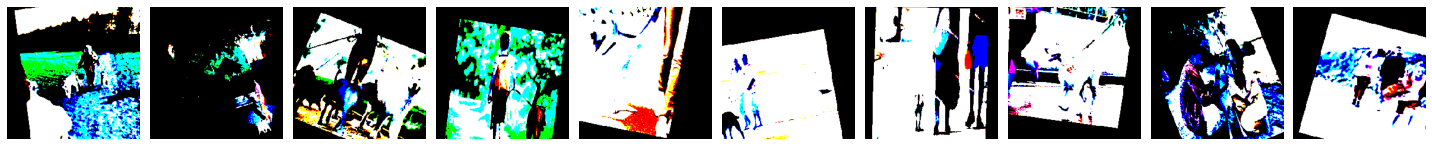

[[1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [7]:
plotImages(imgs)
print(labels)

# build deep learning model

In [8]:
#build a fine-tuned pre-trained model

mobile = tf.keras.applications.mobilenet.MobileNet()
mobile.summary()

2022-04-08 19:27:40.082523: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-04-08 19:27:40.082594: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (pccb150): /proc/driver/nvidia/version does not exist
2022-04-08 19:27:40.083314: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                         

                                                                 
 conv_pw_8_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_pw_8_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_dw_9 (DepthwiseConv2D)  (None, 14, 14, 512)      4608      
                                                                 
 conv_dw_9_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_dw_9_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_pw_9 (Conv2D)          (None, 14, 14, 512)       262144    
                                                                 
 conv_pw_9

In [9]:
x = mobile.layers[-6].output

In [10]:
output = Dense(units=3, activation='softmax')(x)

In [11]:
from tensorflow.keras.models import Model
model = Model(inputs=mobile.input, outputs=output)

In [12]:
for layer in model.layers[:-23]:
    layer.trainable = False

In [13]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                      

                                                                 
 conv_pw_8_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_pw_8_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_dw_9 (DepthwiseConv2D)  (None, 14, 14, 512)      4608      
                                                                 
 conv_dw_9_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_dw_9_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_pw_9 (Conv2D)          (None, 14, 14, 512)       262144    
                                                                 
 conv_pw_9

# train deep learning model

In [14]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [15]:
model.fit(x=train_batches,
    steps_per_epoch=len(train_batches),
    validation_data=valid_batches,
    validation_steps=len(valid_batches),
    epochs=5,
    verbose=2
)

Epoch 1/5


ValueError: in user code:

    File "/home/kemi/.local/lib/python3.8/site-packages/keras/engine/training.py", line 1021, in train_function  *
        return step_function(self, iterator)
    File "/home/kemi/.local/lib/python3.8/site-packages/keras/engine/training.py", line 1010, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/kemi/.local/lib/python3.8/site-packages/keras/engine/training.py", line 1000, in run_step  **
        outputs = model.train_step(data)
    File "/home/kemi/.local/lib/python3.8/site-packages/keras/engine/training.py", line 860, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/home/kemi/.local/lib/python3.8/site-packages/keras/engine/training.py", line 918, in compute_loss
        return self.compiled_loss(
    File "/home/kemi/.local/lib/python3.8/site-packages/keras/engine/compile_utils.py", line 201, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/home/kemi/.local/lib/python3.8/site-packages/keras/losses.py", line 141, in __call__
        losses = call_fn(y_true, y_pred)
    File "/home/kemi/.local/lib/python3.8/site-packages/keras/losses.py", line 245, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/home/kemi/.local/lib/python3.8/site-packages/keras/losses.py", line 1789, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "/home/kemi/.local/lib/python3.8/site-packages/keras/backend.py", line 5083, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, None) and (None, 7, 7, 3) are incompatible


# create frozen graph(.pb) and config file(.pbtxt)

In [ ]:
from tensorflow.python.framework.convert_to_constants import convert_variables_to_constants_v2

full_model = tf.function(lambda x: model(x))
full_model = full_model.get_concrete_function(
    tf.TensorSpec(model.inputs[0].shape, model.inputs[0].dtype))

# Get frozen ConcreteFunction
frozen_func = convert_variables_to_constants_v2(full_model)
frozen_func.graph.as_graph_def()

layers = [op.name for op in frozen_func.graph.get_operations()]
print("-" * 50)
print("Frozen model layers: ")
for layer in layers:
    print(layer)

print("-" * 50)
print("Frozen model inputs: ")
print(frozen_func.inputs)
print("Frozen model outputs: ")
print(frozen_func.outputs)

# Save frozen graph from frozen ConcreteFunction to hard drive
tf.io.write_graph(graph_or_graph_def=frozen_func.graph,
                  logdir="home/kemi/Documents/frozen_models",
                  name="unmonitored_dogs_frozen_graph.pb",
                  as_text=False)

# Save configuration file from frozen ConcreteFunction to hard drive
tf.io.write_graph(graph_or_graph_def=frozen_func.graph,
                  logdir="home/kemi/Documents/frozen_models",
                  name="unmonitored_dogs_frozen_graph.pbtxt",
                as_text=True)

In [ ]:
#model can also be saved with keras in .h5 format
#model.save(home/kemi/Documents/unmonitored_dogs.h5")

# preprocessing test data

In [ ]:
test_imgs, test_labels = next(test_batches)
plotImages(test_imgs)
print(test_labels)

# test deep learning model

In [ ]:
predictions = model.predict(x=test_batches, steps=len(test_batches), verbose=0)

# analyze model performance

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
cm = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis=-1))

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
test_batches.class_indices

In [ ]:
cm_plot_labels = ['looselyChained', 'tightlyChained', 'unchained']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [ ]:
from sklearn.metrics import precision_recall_fscore_support
print(precision_recall_fscore_support(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis=-1), average='micro'))